In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pvpro import PvProHandler

In [2]:
# Import synthetic data
df = pd.read_pickle('synth01_out.pkl')

In [3]:
df.columns

Index(['dni', 'ghi', 'temperature_air', 'wind_speed', 'year', 'month', 'day',
       'hour', 'minute', 'poa_actual', 'poa_meas', 'temperature_module_actual',
       'temperature_cell_actual', 'temperature_module_meas', 'cells_in_series',
       'alpha_sc', 'diode_factor', 'nNsVth_ref', 'photocurrent_ref',
       'saturation_current_ref', 'resistance_shunt_ref',
       'conductance_shunt_extra', 'resistance_series_ref', 'EgRef', 'dEgdT',
       'i_sc', 'v_oc', 'i_mp', 'v_mp', 'p_mp', 'i_x', 'i_xx', 'i_sc_ref',
       'v_oc_ref', 'i_mp_ref', 'v_mp_ref', 'p_mp_ref', 'i_x_ref', 'i_xx_ref',
       'alpha_isc', 'beta_voc', 'alpha_imp', 'beta_vmp', 'gamma_pmp',
       'alpha_i_x', 'alpha_i_xx', 'tempco_photocurrent',
       'tempco_saturation_current', 'tempco_resistance_series',
       'tempco_resistance_shunt', 'tempco_nNsVth', 'v_dc', 'i_dc'],
      dtype='object')

In [4]:
# Make PvProHandler object to store data.
pvp = PvProHandler(df,
                   system_name='synthetic',
                   delta_T=3,
                   use_clear_times=False,
                   cells_in_series=60,
                   resistance_shunt_ref=df['resistance_shunt_ref'].mean(),
                   alpha_isc=0.001,
                   voltage_key='v_dc',
                   current_key='i_dc',
                   temperature_module_key='temperature_module_meas',
                   irradiance_poa_key='poa_meas',
                   modules_per_string=1,
                   parallel_strings=1,
                   )

In [5]:
pvp.df

,dni,ghi,temperature_air,wind_speed,year,month,day,hour,minute,poa_actual,...,gamma_pmp,alpha_i_x,alpha_i_xx,tempco_photocurrent,tempco_saturation_current,tempco_resistance_series,tempco_resistance_shunt,tempco_nNsVth,v_dc,i_dc
1998-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-01-01 22:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-01 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-01 23:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-01 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Preprocess
pvp.run_preprocess(run_solar_data_tools=False)

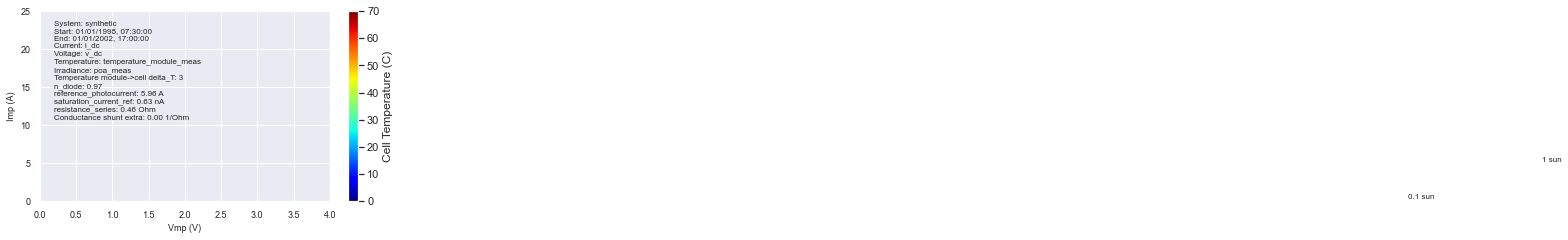

In [5]:
# Plot startpoint on top of data.
fig = pvp.plot_Vmp_Imp_scatter(df=pvp.df,
                         p_plot=pvp.p0,
                         figure_number=4,
                         plot_vmp_max=4,
                         plot_imp_max=25)
# plt.title('Startpoint')
# plt.show()

In [6]:
# Set boolean mask for which points to include.
boolean_mask = pvp.df['poa_meas'] > 10

# Set hyperparameters for running model.
hyperparams = {
    'use_voc_points': True,
    'use_mpp_points': True,
    'use_clip_points': False,
    'method': 'minimize',
    'solver': 'L-BFGS-B',
    'days_per_run': 30,
    'time_step_between_iterations_days': 30,
    'start_point_method': 'last',
    'save_figs_directory': 'figures',
    'plot_imp_max': 7,
    'plot_vmp_max': 35,
    'boolean_mask': boolean_mask
}


In [9]:
ret = pvp.execute(iteration=[0,1],
                      save_figs=False,
                      verbose=False,
                      **hyperparams)


--
Percent complete: 0.0%, Iteration: 0

--
Percent complete: 2.1%, Iteration: 1
Elapsed time: 0.09 min


In [8]:
pfit = pvp.result['p']
print(pfit)

   photocurrent_ref saturation_current_ref resistance_series_ref  \
0           6.02517            8.33573e-10               0.32939   
1           6.00465            4.56751e-10              0.363258   
2               NaN                    NaN                   NaN   
3               NaN                    NaN                   NaN   
4               NaN                    NaN                   NaN   
5               NaN                    NaN                   NaN   
6               NaN                    NaN                   NaN   
7               NaN                    NaN                   NaN   
8               NaN                    NaN                   NaN   
9               NaN                    NaN                   NaN   
10              NaN                    NaN                   NaN   
11              NaN                    NaN                   NaN   
12              NaN                    NaN                   NaN   
13              NaN                    NaN      